# Assignment 1 : Train a Neural Network 

### Goals

Apply plain vanilla gradient descent to train a (relatively simple) neural network. 
The network can be used for a (relatively simple) binary classification task such as for distinguishing handwritten digits from images. 

For the implementation, a cost function is defined (on the training dataset) and the gradient w.r.t. the parameters of the model need to be calculated. 

The network is a _fully connected neural network_ (multi-layer perceptron, MLP) with a single hidden layer. The implementation should be capable of dealing with differently shaped input datasets (input size of flattened image $n_0$) and number of units in the hidden layer ($n$). This will allow to apply your implementation to different datasets, e.g. MNIST. 

**Overview**

| Step | Content | Points |
| :--- | :--- | :---: |
| Step 1 | Derive Formulas | 10 |
| Step 2 | Implement Model and Cost Function and its Gradients | 12 |
| Step 3 | Implement Gradient Descent Training | 8 |
| Step 4 | Apply GD to Wine Type Classification (red,white) | 6 |
| Step 5 | Apply GD to MNIST | 6 |
| Step 6 | Implement Gradient Checking | 8 |
| Total | | 50 |


Please send your solution per mail to [Martin](mailto:martin.melchior@fhnw.ch).


## Introductionary Remarks: Imports, Plotting

Implement the model as described below with <code>Numpy</code>. 
For plotting use <code>Matplotlib</code>. 

Hence, you will only need the following imports:


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

For tracking progress of the optimization, you will plot the cost as a function of the iteration (or "epoch"). For this purpose, you can use the method <code>learningcurve_plots</code>. 

In [2]:
def learningcurve_plots(cost_hist, learning_speed_hist, logy=False, yrange=None):
    """
    cost_hist -- history of cost values, as numpy-array of shape (T,1)
    learning_speed_hist -- history of learning speed values, as numpy-array of shape (T,1)
    logy -- if set to True will plot the y axis at logarithmic scale
    """
    plt.figure(1)
    T = len(cost_hist)
    if logy:
        plt.semilogy(np.arange(T),cost_hist,'b-')
    else:
        plt.plot(np.arange(T),cost_hist,'b-')
    plt.title("Cost")
    if yrange:
        plt.ylim(yrange[0])
        
    plt.figure(2)
    T = len(learning_speed_hist)
    if logy:
        plt.semilogy(np.arange(T),learning_speed_hist,'g-')
    else:
        plt.plot(np.arange(T),learning_speed_hist,'g-')
    plt.title("Learning Speed")
    if yrange:
        plt.ylim(yrange[1])
    

## Step 1 : Derive Formulas for Binary Classification

### (a) Model Function and Gradient 

In binary classification, we just distinguish two different classes from each other, which are given the labels $0$ and $1$. The model is designed to produce an output $a^{(out)}=\sigma\left(z^{(out)}\right)$ which should provide a value close to $0$ for class $0$ and a value close to $1$ for class $1$ (see below how $z^{(out)}$ is defined). In the following, we describe the model function for which you should then compute the gradient. 

As described above, the model contains a single hidden layer with $n^{(h)}$ units which consume inputs from $n^{(in)}$ input elements (given by the given by the length of the input array). To compute the output from the input $x$, the following formulas hold:

$a^{(h)} = \sigma\left(W^{(h)}\cdot x + b^{(h)}\right)$<br>
$a^{(out)} = \sigma\left(W^{(out)}\cdot a^{(h)} + b^{(out)}\right)$

where 
* $W^{(h)}$ is a $n^{(h)}\times n^{(in)}$-matrix, 
* $b^{(h)}$ is a $n^{(h)}\times 1$-matrix, 
* $W^{(out)}$ is a $1\times n^{(h)}$-matrix, 
* $b^{(out)}$ is a scalar 

and $\sigma(z)=\frac{1}{1+\exp(-z)}$ is the sigmoid function which is applied element-wise if the input is a vector or a matrix. The output of the model $a^{(out)}$ is a scalar. Note that the model output is a function of the input $x$ and the model parameters summarized as $\theta$, i.e. 

$$a^{(out)}=y^{(pred)}(x^{(in)},\theta)$$

Derive the formulas for the partial derivatives with respect to the components of the parameters $\theta$, i.e. of the components of $W^{(h)}, b^{(h)}, W^{(out)}, b^{(out)}$.
Define a scheme that makes efficient use of intermediate results, i.e. make manifest the terms that can be re-used for computing the parameters of the output and the hidden layer as well as the terms that can be reused to compute the weights and the bias for the output or the hidden layer. 


### (b) Cost Function and Derivatives

As cost function, we use the binary cross-entropy loss applied to the model prediction $y^{(pred)}=a^{(out)}$ defined to be

$$L(y^{(pred)}, y) = -y\log(y^{(pred)})-(1-y)\log(1-y^{(pred)})$$

Here, $y$ denotes the binary label associated with the input, i.e. $y\in\{0,1\}$. For a given input $x^{(in)}=x$ we use the model with parameters $\theta$ to predict the output $y^{(pred)}(x,\theta)=a^{(out)}$ and then compute the loss according to the formula above. 

The cost function is defined as the loss function averaged over all the samples in the dataset, i.e.

$$C(\theta) = \frac{1}{N}\sum_{i=1}^N\,L\left(y^{(pred)}(x^{(i)},\theta), y^{(i)}\right)$$

We now use gradient descent to determine the parameters $\theta$ at which the cost function becomes minimal.

When computing the gradient of this cost w.r.t. model parameters, you need to compute the derivative of the cross entropy loss function, $L$ w.r.t. $y^{(pred)}$  and apply the chain rule.

Derive the formula for the derivative of $L$ w.r.t. $y^{(pred)}$.

### (c) Gradient of Cost Function w.r.t. Parameters of the Model

Finally, you can combine the results of (a) and (b) and provide the formulas for the derivatives of the cost function w.r.t. the parameters of the model. Try to formulate the result with arrays and manipulations of arrays without summing over its indices (e.g. with matrix multiplication, etc.). These arrays operations can be efficiently computed by using numpy.

## Step 2 : Implement Model and Cost Function and its Gradient

Here, you translate the formulas of step 1 into code. 

### (a) Model

For convenience, we define the model as a python class which allows to keep the parameters and intermediate results (such as $a^{(h)}$) as member variables.

The class should have the following methods:
* $forward(x)$ : Compute the model output when passing an input $x$ through the model. Implement it such that you can handle multiple inputs at the same time, i.e. assume $x$ is a numpy array of shape $(n^{(in)},N)$ where $N$ is the number of inputs.
* $backprop(\dots)$ : Compute the gradient with respect to the model parameters. 
* $initialize(\dots)$ : Set initial values for the model parameters.
* $update\_params(\dots)$: Update the model parameters in accordance with the gradient descent update rule.

Make efficient use of the scheme derived in problem 1 by keeping intermediate results as member variables. Assume that $backprop$ is called after $forward$ has been invoked. Introduce suitable member variables for the intermediate variables needed for the computation of the gradients. Furthermore, introduce member variables for the parameters (weights, bias) and their gradients.  

Assume the following shapes for the quantities involved ($n^{(in)}=n0, n^{(h)}=n1$):
* $W^{(h)}$ : 2d numpy array of shape (n1,n0)
* $b^{(h)}$ : 1d numpy array of shape (n1,1)
* $W^{(out)}$ : 1d numpy array of shape (1,n1)
* $b^{(out)}$ : scalar quantity 
* $x^{(in)}$ : 2d numpy array of shape (n0,N)
* $a^{(h)}$ : 2d numpy array of shape (n1,N)
* $a^{(out)}$ : 2d numpy array of shape (1,N)

Note by doing this, we keep the different samples in the columns of the arrays for the input and the activation in the hidden layer and the output .

For the gradients, there will be a contribution for each input which needs to be properly averaged. The resulting gradient should have the same dimension as the parameter arrays. The input to the $backprop$ function is fed in form of the derivative of the loss function (evaluated element-wise per sample). This will allow to compute gradients with respect to the parameters, properly averaged over all the samples ($N$). 

In view of the unit tests (see below), we follow (our) convention that the parameters arrays (weights, biases) have the same shape as the gradients of the loss w.r.t. these parameters arrays.

Complete the methods of the function below where needed (or as indicated with <code>## START YOUR CODE ##</code> or <code>## END YOUR CODE ##</code>).


In [3]:
class Model:

    def __init__(self, ninput, nhidden):
        """
        Constructor of the model designed for given input dimension and number of units in hidden layer.
        
        Arguments:
        ninput - size of input (n0)
        nhidden - size of hidden layer (n1)
        """
        self.ninput = ninput
        self.nhidden = nhidden
        
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def initialize(self, initial_weights_hidden, initial_weights_output):
        """
        Initialize the weights of the model with given input arguments and reset the biases to zero values. 
        
        Arguments:
        initial_weights_hidden - initial weights of the hidden layer (must be of shape (nhidden, ninput))
        initial_weights_output - initial weights of output layer (must be of shape (1, nhidden))
        """
        assert (self.nhidden,self.ninput)==initial_weights_hidden.shape
        assert (1,self.nhidden)==initial_weights_output.shape
        self.weights_hidden = initial_weights_hidden
        self.weights_output = initial_weights_output
        self.bias_hidden = np.zeros((self.nhidden,1), dtype=float)
        self.bias_output = 0.0
        
    def forward(self, x):
        """
        Computes the forward path through the model. Keeps as state variables the inputs and the activations of the hidden layer and the output layer 
        (as numpy arrays of shape (n0,N), (n1,N), (1,N)). The activations of the output layer are given as return values.
        
        Arguments:
        x - shape (n0, N)
        
        Returns:
        output of the model, numpy array of shape (1,N)
        """
        ## START YOUR CODE ##
        

        
        
        
        
        
        
        
        
        
        ## END YOUR CODE ##
        
    def backprop(self, deriv_loss):
        """
        The computation is done after running forward(). It keeps the gradient components with respect to the different 
        parameters in suitable arrays defined as member variables: 
        - grad_weights_hidden
        - grad_bias_hidden
        - grad_weights_output
        - grad_bias_output
        Note by passing in the derivate with respect to the loss it allows to compute the components of the gradient of the loss.
        
        Arguments:
        deriv_loss - the gradient of the loss w.r.t. output of the model, a numpy array of shape (1,N)
        
        Returns:
        None
        
        """
        # number of samples
        N = deriv_loss.shape[1]
        
        ## START YOUR CODE ##
        # output layer

        
        
        
        
          
        # hidden layer
 
        
        
        
        
        
        ## END YOUR CODE ##
        
        
    def update_params(self, lr):
        """
        Updates the parameters of the model according to gradient descent. It is assumed that the weights are properly initialized and the gradients
        previously computed.
        
        Arguments:
        lr - learning rate
        
        Returns:
        None
        
        """
        ## START YOUR CODE ##

        
        
        
        
        
        ## END YOUR CODE ##
            

#### TEST

In [4]:
# Unit test - following the convention that 
# shape of gradients w.r.t. weights/biases = shape of weights/biases

# Test with a tiny model and one sample
mtest = Model(2,3)
whidden = np.array([[0.1,0.9],[-0.2,0.7],[1.1,-1]]).reshape(3,2)
woutput = np.array([[0.5,-0.3,.1],]).reshape(1,3)

# sample
x = np.array([1,1]).reshape(2,1)

# initialize
mtest.initialize(whidden, woutput)
np.testing.assert_array_almost_equal_nulp(whidden, mtest.weights_hidden)
np.testing.assert_array_almost_equal_nulp(woutput, mtest.weights_output)

# forward
np.testing.assert_almost_equal(0.5575659, mtest.forward(x), decimal=7)

# backward
mtest.backprop(np.array([1,]).reshape(1,1))

# shapes
np.testing.assert_allclose((1,3), mtest.grad_weights_output.shape) # woutput.shape=(1,3)
#mtest.grad_bias_output -> scalar value
np.testing.assert_allclose((3,2), mtest.grad_weights_hidden.shape) # whidden.shape=(3,2)
np.testing.assert_allclose((3,1), mtest.grad_bias_hidden.shape) # bias_hidden = (3,1)

# regression results for the gradients
np.testing.assert_almost_equal(0.24668616, mtest.grad_bias_output)
np.testing.assert_array_almost_equal(np.array([0.18034203,0.1535521,0.1295051]).reshape(1,3), mtest.grad_weights_output, decimal=7)
np.testing.assert_array_almost_equal(np.array([0.02425072,-0.01739165,0.00615176]).reshape(3,1), mtest.grad_bias_hidden, decimal=7)
np.testing.assert_array_almost_equal(np.array([[0.02425072,-0.01739165,0.00615176],[0.02425072,-0.01739165,0.00615176]]).T, mtest.grad_weights_hidden, decimal=7)


In [5]:
# Unit test - following the convention that 
# shape of gradients w.r.t. weights/biases = shape of weights/biases

# Test with a tiny model and two samples
mtest = Model(2,3)
mtest.initialize(whidden, woutput)
whidden = np.array([[0.1,0.9],[-0.2,0.7],[1.1,-1]]).reshape(3,2)
woutput = np.array([[0.5,-0.3,.1],]).reshape(1,3)

# sample
x = np.array([[1,1],[-0.1,-0.6]]).T

# forward
np.testing.assert_array_almost_equal(np.array([0.5575659,0.5310971]).reshape(1,2), mtest.forward(x), decimal=7)

# backward
mtest.backprop(np.array([1,-0.1]).reshape(1,2))

# shapes
np.testing.assert_allclose((1,3), mtest.grad_weights_output.shape) # woutput.shape=(1,3)
#mtest.grad_bias_output -> scalar value
np.testing.assert_allclose((3,2), mtest.grad_weights_hidden.shape) # whidden.shape=(3,2)
np.testing.assert_allclose((3,1), mtest.grad_bias_hidden.shape) # bias_hidden = (3,1)

# regression results for the gradients
np.testing.assert_almost_equal(0.1108914, mtest.grad_bias_output, decimal=7)
np.testing.assert_array_almost_equal(np.array([0.0856154,0.0717791,0.0570312]).reshape(1,3), mtest.grad_weights_output, decimal=7)
np.testing.assert_array_almost_equal(np.array([0.0106809,-0.0077983,0.0027826]).reshape(3,1), mtest.grad_bias_hidden, decimal=7)
np.testing.assert_array_almost_equal(np.array([[0.01226980,-0.00878557,0.00310521],[0.01299202,-0.00923432,0.00325188]]).T, mtest.grad_weights_hidden, decimal=7)


### (b) Cost, Loss 

Similarly, we define a class for the Cross-Entropy loss function. While the loss has been defined in 1b), the **cost** just takes the average over all data points in the dataset used for training.

Implement for the cross-entropy class the instance methods 
* $cost(...)$
* $derivative\_loss(...)$

as described below. Note that these are evaluated for given numpy arrays $ypred$ and $ytrue$ with the model prediction $a^{(out)}$ and the true label $y$, each of shape $(1,N)$. 

In [6]:
class CrossEntropy:

    def cost(self, ypred, ytrue):
        """
        Computes the average binary cross entropy cost for given arrays ytrue and ypred, with the ground truth label values (in {0,1}) 
        and the predicted proabability to observe label 1, respectively.  

        Arguments:
        ypred - numpy array of shape (1,N) with the predicted values for N data points
        ytrue - numpy array of shape (1,N) with the ground truth values for N data points

        Returns:
        Cost averaged over the samples, i.e. a scalar value.
        """
        assert ytrue.shape==ypred.shape
        
        ## START YOUR CODE ##

        
        
        
        ## END YOUR CODE ##
    
    def derivative_loss(self, ypred, ytrue):
        """
        Computes the derivative of the cross entropy loss function for given true label y and predicted ypred. 
        We expect numpy arrays to be passed as input arguments, so that the derivative should be computed element-wise. 

        Arguments:
        ypred - numpy array of shape (1,N) with the predicted values for N data points
        ytrue - numpy array of shape (1,N) with the ground truth values for N data points

        Returns:
        Element-wise derivative of the loss function (numpy array of shape (1,N))
        """    
        ## START YOUR CODE ##

        
        
        
        
        ## END YOUR CODE ##
        

## Step 3: Implement the Gradient Descent Training (GD)

Implement the gradient descent update loop for a given instance of the model and cost.

In order to monitor the update of the training, keep book at each iteration about 
* value of the cost (at the given parameters)
* learning speed (~length of the gradient) 

In [7]:
def vanilla_gradient_descent(model, cost, weights_hidden, weights_output, data, lr, epochs):
    """
    Performs plain vanilla gradient descent for the cost function. The variables x of the function are provided as np-arrays.
    
    Arguments:
    model -- model
    cost -- cost function object
    weights_hidden -- (initial) weights in the hidden layer (numpy array of shape (n1,n0))
    weights_output -- (initial) weights in the output layer (numpy array of shape (1,n1))
    data -- dataset as dictionary with the input data (key: "input" | value: numpy array of shape (n0,N)) and label data (key: "label" | numpy array of shape (1,N)) 
    lr -- learning rate
    epochs -- maximum number of iterations
    
    Returns:
    cost_hist -- history of the values of the cost function seen during the iteration loop: np-array of shape (T,1) where T is the number of iteration needed (also referred to as 'epochs').
    learning_speed_hist -- history of the learning speed where the learning speed given by the norm of the difference between subsequent x-values: np-array of shape (T,1) where T is the number of iteration needed.
    """
    
    model.initialize(weights_hidden, weights_output)    
    x = data["input"]
    ytrue = data["label"]
    
    ## START YOUR CODE ##    
    

    
    
    
    
    
    
    
    
    
    ## END YOUR CODE ##


The following helper function should be used to initialize the weights arrays - it is passed to the $initialize$-method of the <code>Model</code> class.  

In [8]:
def initial_weights(n0, n1):
    """
    Prepares a random 2d numpy array of shape (n0,n1) suited as initial weights for the training of the neural network model.
    """
    
    weights_hidden = np.random.normal(size=(n1,n0), loc=0.0, scale=1.0/np.sqrt(n1*n0))
    weights_output = np.random.normal(size=(1,n1), loc=0.0, scale=1.0/np.sqrt(n1))
    return weights_hidden, weights_output

## Step 4: Example Wine Type Classifier

In this step you will use a neural Network model as implemented above to train a classifier for wine type (red | white) from a few characteritstics such as acidicity, sulfur content, pH value, density, alcohol content, etc. 
You are given two csv-files (wines.csv, winetypes.csv) that you can use for training. In the files wines_test.csv and winetypes_test.csv you have additional samples that are not used for training, but that you can use for testing for whether the trained model is suited for classifying "new" wines. This allows you to get a judgement about the trained classifier on samples not seen during training.

### Load Data

For loading the data, you can use the following code. Step through the following cells - you will see tables with the features and the type. The type information (red and white) is mapped to integer label values '0' and '1'. 

In [9]:
df = pd.read_csv('../../data/winequality/winequality.csv').dropna()
df = df.sample(frac=1).reset_index(drop=True)
encoder = LabelEncoder()
y = encoder.fit_transform(df['type'])
df['type'] = y

dftrain = df.iloc[:5000,:]
dftest = df.iloc[5000:,:]

dftrain.to_csv('../../data/winequality/wines.csv', index=False)
dftest.to_csv('../../data/winequality/wines_test.csv', index=False)

In [10]:
df = pd.read_csv('../../data/winequality/wines.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,6.0,0.34,0.66,15.9,0.046,26.0,164.0,0.99790,3.14,0.50,8.8,6
1,1,6.5,0.16,0.34,1.4,0.029,29.0,133.0,0.99108,3.33,0.64,11.5,7
2,0,10.0,0.73,0.43,2.3,0.059,15.0,31.0,0.99660,3.15,0.57,11.0,5
3,1,7.2,0.26,0.44,7.1,0.027,25.0,126.0,0.99300,3.02,0.34,11.1,8
4,0,6.7,0.67,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6


In [11]:
dftest = pd.read_csv('../../data/winequality/wines_test.csv')
dftest.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,6.4,0.320,0.26,7.9,0.050,53.0,180.0,0.995140,3.14,0.50,9.6,5
1,0,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.996600,3.12,0.59,9.9,5
2,0,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.996050,3.36,0.55,11.4,6
3,1,6.4,0.460,0.22,14.7,0.047,51.0,183.0,0.998275,3.39,0.60,10.5,5
4,1,6.7,0.200,0.41,9.1,0.044,50.0,166.0,0.995400,3.14,0.58,9.8,6


In [12]:
x = df.drop('type', axis=1).values.T
y = df['type'].values.reshape(1,x.shape[1])
print(x.shape, y.shape)

(12, 5000) (1, 5000)


In [13]:
xtest = dftest.drop('type', axis=1).values.T
ytest = dftest['type'].values.reshape(1,xtest.shape[1])
print(xtest.shape, ytest.shape)

(12, 1463) (1, 1463)


### Run training of model

Now instantiate a model with a suitable choice of $n0, n1$ and train it with the training data by using a suitable learning rate and number of epochs.
Always check the learning curves for the cost. At the end of the training compute the training and test error rates (number of wrong prediction for training samples as a fraction of total number of traing samples and similarly for test error).
Play with different $n1, lr, n_{\rm epochs}$ to obtain a "good" model. What is "good"? 

Learning Rate: 0.02000
Epochs: 1000.00000
Number of iterations: 1000, final cost: 0.19699, final speed: 0.03738
Error Rate (training|test): 0.06280 | 0.07382


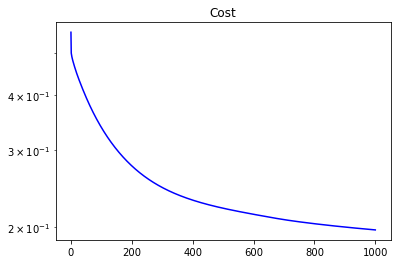

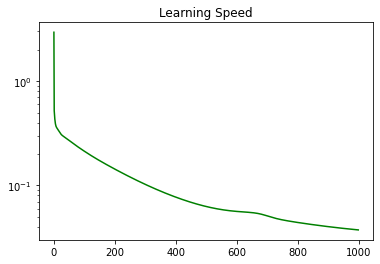

In [15]:
## START YOUR CODE ##

n0,n1 = ...
lr = ...
epochs = ...
print("Learning Rate: %6.5f"%lr)
print("Epochs: %6.5f"%epochs)
data ={'input':x,'label':y}

# model, training
model = ...
cost = ...
weights_hidden0, weights_output0 = initial_weights(n0, n1)

cost_hist, learning_speed_hist = ...
T = cost_hist.size-1
print("Number of iterations: %i, final cost: %6.5f, final speed: %6.5f"%(T, cost_hist[-1,0], learning_speed_hist[-1,0]))
learningcurve_plots(cost_hist, learning_speed_hist, logy=True)

# Error Rate
error_rate = ...

error_rate_test = ...

print("Error Rate (training|test): %6.5f | %6.5f"%(error_rate,error_rate_test))

## END YOUR CODE ##

## Step 5: Apply GD to MNIST

Here, we want to train a classifier for the MNIST dataset that is often used in machine learning. The images are hand-written digits of size 28x28. Hence, the samples will be arrays of length 28x28=784 and its elements correspond to the gray-scale values of the pixels (normalized to be included in [0,1]).
For turning that into a binary classification problem, we filter the data for two selected digits, e.g. '5' and '8'.
The label values are set to '1' (`true`) if the hand-written figure is a e.g. a '5' and '0' (`false`) if it is a '8'. 

### Load Data

For loading the data, you can use the following code.

In [16]:
import struct
import matplotlib.pyplot as plt

def load_mnist(images_path, labels_path):
    with open(labels_path, "rb") as lbpath:
        magic, n = struct.unpack(">II", lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    labels = labels.reshape(1,-1)
    with open(images_path, "rb") as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(-1,784).T
    return images, labels

def filter_digits(X,Y,digit1,digit2, split=0.8, shuffle=True):
    X1=X[:,Y[0,:]==digit1]
    N1 = X1.shape[1]
    Y1=np.zeros((1,N1))
    X2=X[:,Y[0,:]==digit2]
    N2 = X2.shape[1]
    Y2=np.ones((1,N2))
    X = np.concatenate((X1,X2), axis=1)
    Y = np.concatenate((Y1,Y2), axis=1)
    N = X.shape[1]
    if shuffle:
        index = np.random.permutation(N)
        X,Y = X[:,index], Y[:,index]
    M = int(split*N)
    Xtrain, Ytrain = X[:,:M], Y[:,:M]
    Xtest, Ytest = X[:,M:], Y[:,M:]
    return Xtrain, Ytrain, Xtest, Ytest
    
def display(X,Y,item):
    plt.imshow( X[:,item].reshape(28,28), cmap='binary')
    plt.title( "Label: " + str( Y[0,item] )) 
        

PIXELS = (28,28)
COLS = 5
def plot_digits(X,Y,indices):
    """
    Plots the digits in a mosaic with up to 8 columns

    Arguments:
    X -- data of size (1, 784)
    Y -- label (a scalar)
    indices -- list of indices    
    """
    if len(indices)==0:
        print("No images to show!")
        return
    cols = min(COLS, len(indices))
    rows = len(indices)/COLS+1
    plt.figure(figsize=(20,5*rows))
    for index, (image, label) in enumerate(zip(X.T[indices,:], Y.T[indices,:])):
        plt.subplot(rows, cols, index+1)
        plt.imshow(np.reshape(image, PIXELS), cmap=plt.cm.gray)
        plt.title('Sample %i\n Label %i\n' % (indices[index],label), fontsize = 12)    

In [17]:
images_path = "../../data/mnist/train-images-idx3-ubyte"
labels_path = "../../data/mnist/train-labels-idx1-ubyte"
X, Y = load_mnist( images_path, labels_path )

print(X.shape,Y.shape)

(784, 60000) (1, 60000)


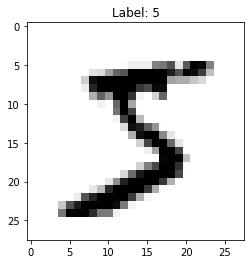

In [105]:
display(X,Y,0)

Now, you can access the samples of the dataset by accessing the columns of $X$. In numpy: `x_i = X[:,i]`. 
If you reshape it to $28x28$ you can eventually recognize the digit depicted on the image (a '0' in the example below):

In [107]:
digit1 = 5
digit2 = 8
Xtrain,Ytrain,Xtest,Ytest = filter_digits(X,Y,digit1, digit2, split=0.8, shuffle=True)
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(784, 9017) (1, 9017) (784, 2255) (1, 2255)


<ipython-input-103-c6d6fe588bb4>:55: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, index+1)


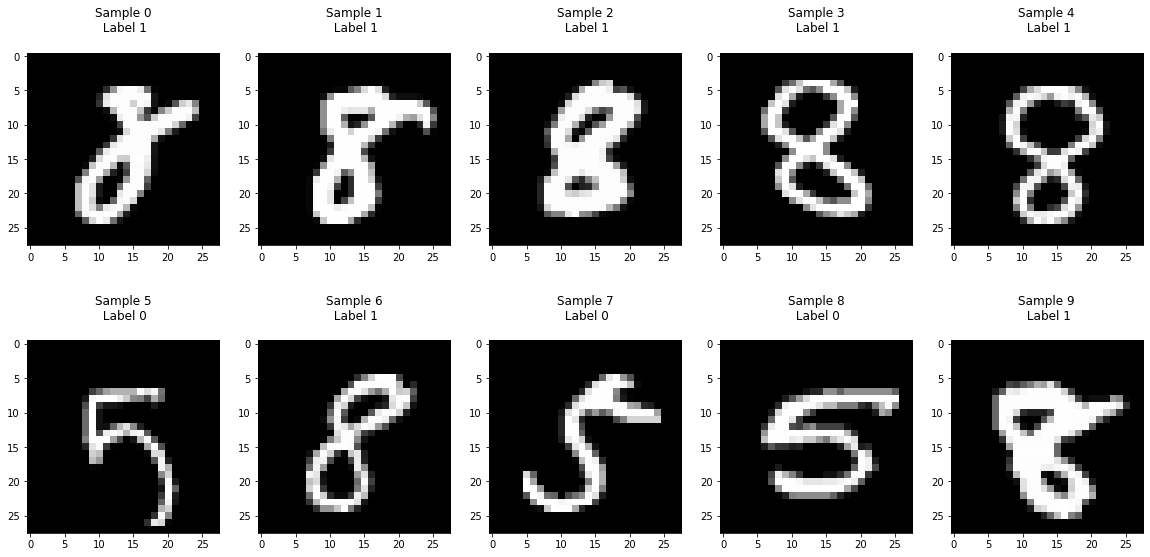

In [108]:
plot_digits(Xtrain,Ytrain,range(10))

### Train Model for 'binary' MNIST-Classification 

Apply the gradient descent to the model defined above. We here ignore ML specific aspects such as using a part of the data 
for validation and test or dealing with class-imbalance. We rather just want to see whether the optimization works.  

(1) Apply the functionality implemented above to train MNIST. Use the <code>learningcurve_plots</code> to visualize whether gradient descent was performing well over the iterations. Also compute the _final error rate_, i.e. the percentage of wrong predictions. The predicted label can be obtained from $y^{(pred)}(\theta,x)$ by just rounding it to 0 or 1.

(2) Compare and characterize the shape of the learning for different learning rates. What's the "best" learning rate (<code>lr</code>). How many iterations (<code>epochs</code>) should be set?

Learning Rate: 0.00200
Epochs: 200.00000
Number of iterations: 200, final cost: 0.12121, final speed: 0.29926
Error Rate (train|test): 0.03394 | 0.04169


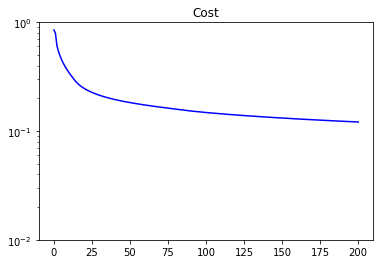

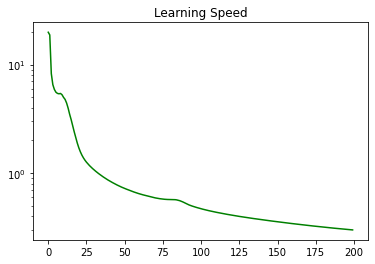

In [128]:
## START YOUR CODE ##

n0 = ...
n1 = ...
lr = ...
epochs = ...
data = {"input":Xtrain, "label":Ytrain}

print("Learning Rate: %6.5f"%lr)
print("Epochs: %6.5f"%epochs)

model = ...
cost = ....
weights_hidden0, weights_output0 = initial_weights(n0, n1)

cost_hist, learning_speed_hist = ...
T = cost_hist.size-1
print("Number of iterations: %i, final cost: %6.5f, final speed: %6.5f"%(T, cost_hist[-1,0], learning_speed_hist[-1,0]))
learningcurve_plots(cost_hist, learning_speed_hist, logy=True, yrange=((0.01,1.0),None))

# Error Rate
error_rate = ...
error_rate_test = ...
print("Error Rate (train|test): %6.5f | %6.5f"%(error_rate,error_rate_test))

# END YOUR CODE


## Step 6: Gradient Checking

Implement the function `numerical_gradient` which computes the numerical gradient based on an approximation of the gradient at a small step size $\varepsilon$. Use the formula: 

$$
\frac{\partial f(x_1,\dots,x_n)}{\partial x_k} \approx \frac{f(x_1,\dots,x_k+\varepsilon,\dots,x_n) - f(x_1,\dots,x_k-\varepsilon,\dots,x_n)}{2\varepsilon}.
$$

Using the class implemented above, you have access to 
* your implementation of the gradient $\frac{\partial y^{\rm (pred)}(x,\theta)}{\partial \theta_k}$ (the quantity under test)
* the model function $y^{\rm (pred)}(x,\theta)$ that you can evaluate at different parameter values, all different in just a single component by the parameter $\varepsilon$ (`eps`).

You can set the parameter values by using the initialize method - by restricting to the _weights_ parameters of the model. This together with the `forward` allows you to compute the model output $a^{\rm (out)}$ for given parameters and $x$. Thereafter, you can compute  the derivatives with respect to the weights by using `backprop`. Note that, as $x$-values, you can use some arbitrary samples (random generated or from the real data - see below). As derivatives w.r.t. the cost you can pass in just 1's.

For which values of $\varepsilon$ (`eps`) do we obtain a resonable numerical approxmiation of the gradient? Test different (not too large values) and use `matplotlib` for determining a reasonable `eps`.  Compute the norm of the the difference vector between the numerical approximation and the analytically computed gradient vector (by using the rules of calculus). 

In [20]:
def numerical_gradient(model, x, weights_hidden, weights_output, eps=1e-5 ):
    """
    Compute for the given model, data point (x,y) and weights parameters (biases equal to zero) a numerical gradient approximation of the 
    gradient. 
    
    Arguments:
    model -- instance of the model class defined above
    x -- data point (np.array with shape (ninput,))
    weights_hidden -- weights matrix of shape (nhidden, ninput)
    weights_output -- weights matrix of shape (noutput, nhidden)
    eps -- value of epsilon (float)
    
    Returns:
    gradient -- numerical gradient at the given weights parameters (for the hidden and the output layer)
    """
    # START YOUR CODE

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    # END YOUR CODE

[1.20780323e-08 9.91737867e-11 7.83659337e-13 2.46922557e-14
 3.55851428e-13 2.43777817e-12 2.70205356e-11 3.70317842e-10
 2.74849114e-09]


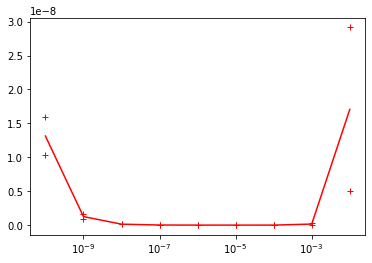

In [21]:
# Comparison with the analytically computed gradient vector

# START YOUR CODE























# END YOUR CODE